                                                        IMPORT LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

                                                        IMPORT DATA

In [6]:
data = pd.read_csv('water_dataX.csv.xls' ,encoding= 'unicode_escape')

In [7]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [8]:
data.tail()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003
1990,1726,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",NAN,29,7.6,110,5.7,1.1,NAN,NAN,546,2003


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [10]:
data.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


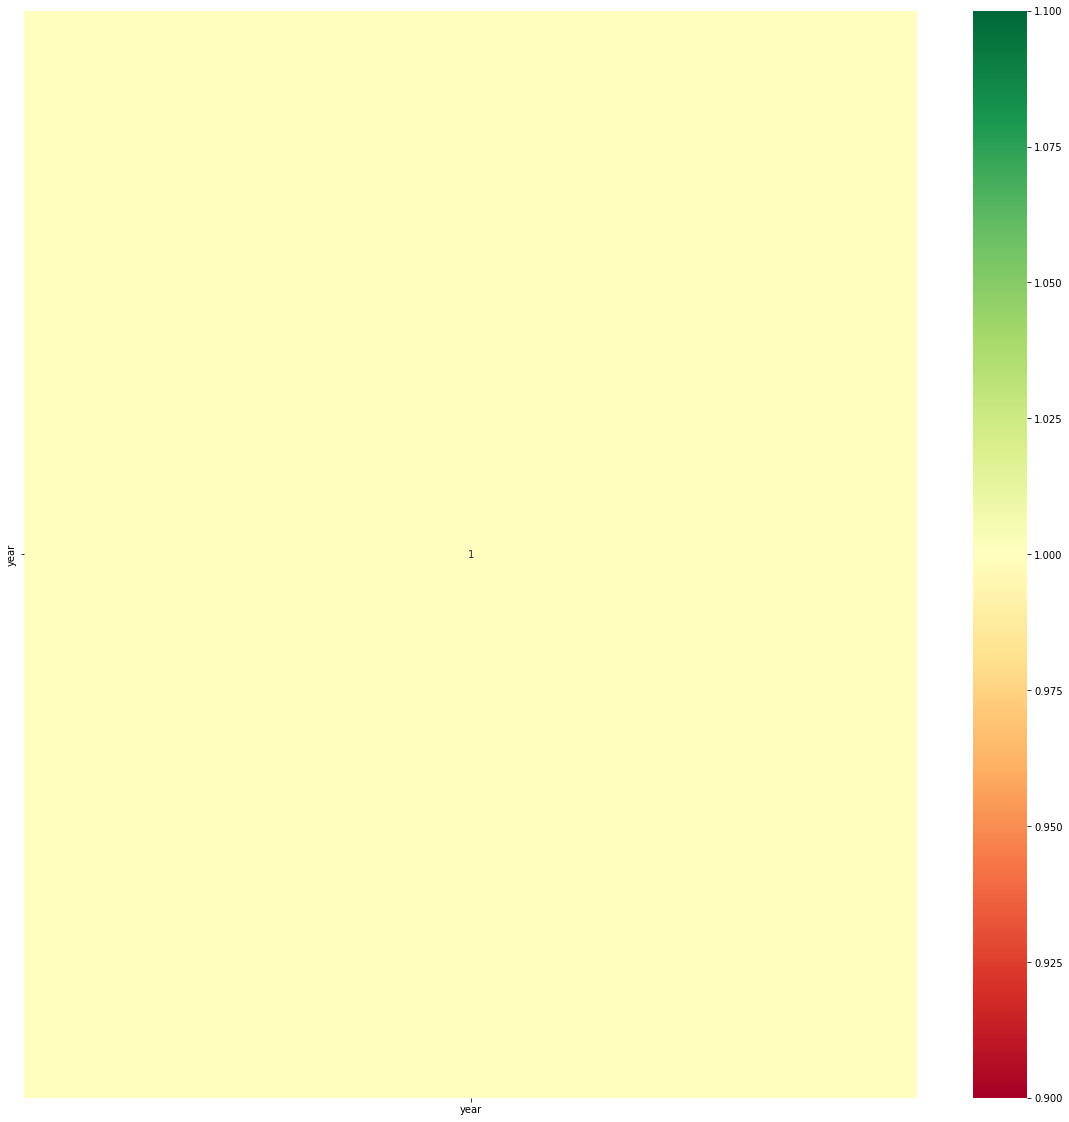

In [11]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

                                                        RENAMING COLUMNS

In [12]:
data.rename(columns={'STATION CODE': 'STATION_CODE', 'D.O. (mg/l)': 'D.O.', 'CONDUCTIVITY (µmhos/cm)':'CONDUCTIVITY','B.O.D. (mg/l)':'B.O.D.','NITRATENAN N+ NITRITENANN (mg/l)':'NITRATENAN','FECAL COLIFORM (MPN/100ml)':'FECAL_COLIFORM','TOTAL COLIFORM (MPN/100ml)Mean':'TOTAL_COLIFORM_Mean'}, inplace=True)

In [13]:
data

,STATION_CODE,LOCATIONS,STATE,Temp,D.O.,PH,CONDUCTIVITY,B.O.D.,NITRATENAN,FECAL_COLIFORM,TOTAL_COLIFORM_Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003


                                                    FINDING MISSING VALUES

In [14]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing.head(20)

,Total,Percent
STATION_CODE,0,0.0
LOCATIONS,0,0.0
STATE,0,0.0
Temp,0,0.0
D.O.,0,0.0
PH,0,0.0
CONDUCTIVITY,0,0.0
B.O.D.,0,0.0
NITRATENAN,0,0.0
FECAL_COLIFORM,0,0.0


In [15]:
data.isnull().sum()

STATION_CODE           0
LOCATIONS              0
STATE                  0
Temp                   0
D.O.                   0
PH                     0
CONDUCTIVITY           0
B.O.D.                 0
NITRATENAN             0
FECAL_COLIFORM         0
TOTAL_COLIFORM_Mean    0
year                   0
dtype: int64

                                                    HANDLING MISSING VALUES

In [17]:
#data = data[~data.State.isnull ()].copy ()
data.drop(data[data['STATE'] == "NAN"].index, inplace = True)
data.isnull().sum()

STATION_CODE           0
LOCATIONS              0
STATE                  0
Temp                   0
D.O.                   0
PH                     0
CONDUCTIVITY           0
B.O.D.                 0
NITRATENAN             0
FECAL_COLIFORM         0
TOTAL_COLIFORM_Mean    0
year                   0
dtype: int64

In [18]:
data

,STATION_CODE,LOCATIONS,STATE,Temp,D.O.,PH,CONDUCTIVITY,B.O.D.,NITRATENAN,FECAL_COLIFORM,TOTAL_COLIFORM_Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1393,1404,NAN,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",29,6.3,7.6,164,2.8,0.1,442,577,2009
1394,1726,NAN,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",28,5.7,7.8,170,3.4,0.2,469,608,2009
1395,1631,NAN,MYNTDU JAINTIA HILLS MEGHALAYA,21,6.4,7.025,187.63,3.175,2.675,2225,2925,2009
1396,1633,NAN,"SIMSANG, WILLIAMNAGAR, MEGHALAYA",25,8.35,7.125,110.75,1.525,3.075,252.5,355,2009


In [19]:
data.drop('LOCATIONS', inplace=True, axis=1)
data

,STATION_CODE,STATE,Temp,D.O.,PH,CONDUCTIVITY,B.O.D.,NITRATENAN,FECAL_COLIFORM,TOTAL_COLIFORM_Mean,year
0,1393,DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...
1393,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",29,6.3,7.6,164,2.8,0.1,442,577,2009
1394,1726,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",28,5.7,7.8,170,3.4,0.2,469,608,2009
1395,1631,MYNTDU JAINTIA HILLS MEGHALAYA,21,6.4,7.025,187.63,3.175,2.675,2225,2925,2009
1396,1633,"SIMSANG, WILLIAMNAGAR, MEGHALAYA",25,8.35,7.125,110.75,1.525,3.075,252.5,355,2009
